<a href="https://colab.research.google.com/github/Zvki1/diabetes-prediction-/blob/main/Diabetes_prediction_project_reguieg_zakaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Diabets Prediction using supervised learning</h1>


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report

<h2> importing  our dataset </h2>

In [ ]:
df=pd.read_csv("diabetes_prediction_dataset.csv")
print(df.shape)
df.head(10)

(100000, 9)


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


<h2>exploring our  features</h2>

In [ ]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

<h2>small debrief of our features</h2>

<ul>
  <li>
    <strong>Gender:</strong> This feature represents the gender of the individual. Gender differences can play a role in diabetes risk due to physiological and hormonal variations.
  </li>
  
  <li>
    <strong>Age:</strong> Age is a crucial factor in diabetes risk assessment. As individuals grow older, their risk of developing diabetes tends to increase, often due to changes in metabolism and lifestyle factors.
  </li>
  
  <li>
    <strong>Hypertension:</strong> Hypertension, or high blood pressure, is a known risk factor for diabetes. Elevated blood pressure can contribute to insulin resistance and impact the overall cardiovascular health of an individual.
  </li>
  
  <li>
    <strong>Heart Disease:</strong> Presence of heart disease in the medical history indicates potential cardiovascular complications, which are commonly associated with diabetes. This feature helps assess the overall health status.
  </li>
  
  <li>
    <strong>Smoking History:</strong> Smoking is a significant lifestyle factor linked to diabetes. It can lead to insulin resistance, inflammation, and other metabolic changes that increase the risk of diabetes development.
  </li>
  
  <li>
    <strong>BMI (Body Mass Index):</strong> BMI provides insights into the individual's weight relative to their height. Elevated BMI is often indicative of obesity, which is a well-established risk factor for type 2 diabetes.
  </li>
  
  <li>
    <strong>HbA1c Level:</strong> HbA1c reflects long-term blood glucose control. Higher levels indicate poor glucose management, suggesting an increased risk of diabetes. This feature helps capture chronic glycemic status.
  </li>
  
  <li>
    <strong>Blood Glucose Level:</strong> Current blood glucose levels provide immediate insight into glycemic control. Elevated levels may signal prediabetes or diabetes, making this feature a direct indicator of risk.
  </li>
  
  <li>
    <strong>Diabetes:</strong> This is the target variable that classifies individuals as diabetic (1) or non-diabetic (0). It is based on the presence of diabetes-related symptoms and clinical tests, acting as the foundation for the prediction task.
  </li>
</ul>

<p>ps:it's generated by chatgpt</p>

<h2>Data exploration</h2>

In [ ]:
df.info()
#from the info we see that we don't have null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


checking the duplicates

In [ ]:
df[df.duplicated()].shape[0]
# we have "3854 duplicated row"
df.drop_duplicates(inplace=True)
df[df.duplicated()].shape[0]
df.shape[0] #checking if it's done
df[df.duplicated()].shape[0]


0

checking the unique values

In [ ]:
for col in df:
  print(f"unique values of {col}:{df[col].unique()}")

unique values of gender:['Female' 'Male' 'Other']
unique values of age:[80.   54.   28.   36.   76.   20.   44.   79.   42.   32.   53.   78.
 67.   15.   37.   40.    5.   69.   72.    4.   30.   45.   43.   50.
 41.   26.   34.   73.   77.   66.   29.   60.   38.    3.   57.   74.
 19.   46.   21.   59.   27.   13.   56.    2.    7.   11.    6.   55.
  9.   62.   47.   12.   68.   75.   22.   58.   18.   24.   17.   25.
  0.08 33.   16.   61.   31.    8.   49.   39.   65.   14.   70.    0.56
 48.   51.   71.    0.88 64.   63.   52.    0.16 10.   35.   23.    0.64
  1.16  1.64  0.72  1.88  1.32  0.8   1.24  1.    1.8   0.48  1.56  1.08
  0.24  1.4   0.4   0.32  1.72  1.48]
unique values of hypertension:[0 1]
unique values of heart_disease:[1 0]
unique values of smoking_history:['never' 'No Info' 'current' 'former' 'ever' 'not current']
unique values of bmi:[25.19 27.32 23.45 ... 59.42 44.39 60.52]
unique values of HbA1c_level:[6.6 5.7 5.  4.8 6.5 6.1 6.  5.8 3.5 6.2 4.  4.5 9.  7.  8.

dealing with the gender Other
we suppose that other is male

In [ ]:
df['gender']=df['gender'].replace('Other','Male')
df[df['gender']=='Other'].shape

(0, 9)

In [ ]:
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
df['gender']=df['gender'].replace({'Male':0,'Female':1})

In [ ]:
df['gender']

0        1
1        1
2        0
3        1
4        0
        ..
99994    1
99996    1
99997    0
99998    1
99999    1
Name: gender, Length: 96146, dtype: int64

In [ ]:
df.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1,80.0,0,1,never,25.19,6.6,140,0
1,1,54.0,0,0,No Info,27.32,6.6,80,0
2,0,28.0,0,0,never,27.32,5.7,158,0
3,1,36.0,0,0,current,23.45,5.0,155,0
4,0,76.0,1,1,current,20.14,4.8,155,0
5,1,20.0,0,0,never,27.32,6.6,85,0
6,1,44.0,0,0,never,19.31,6.5,200,1
7,1,79.0,0,0,No Info,23.86,5.7,85,0
8,0,42.0,0,0,never,33.64,4.8,145,0
9,1,32.0,0,0,never,27.32,5.0,100,0


dealing with smoking history categories

In [ ]:
df['smoking_history'].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [ ]:
df['smoking_history']=df['smoking_history'].replace('ever','never')
df['smoking_history']=df['smoking_history'].replace('not current','former')

In [ ]:
df['smoking_history']=df['smoking_history'].replace({'never':1,'No Info':0,'current':2,'former':3})

In [ ]:
df.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1,80.0,0,1,1,25.19,6.6,140,0
1,1,54.0,0,0,0,27.32,6.6,80,0
2,0,28.0,0,0,1,27.32,5.7,158,0
3,1,36.0,0,0,2,23.45,5.0,155,0
4,0,76.0,1,1,2,20.14,4.8,155,0
5,1,20.0,0,0,1,27.32,6.6,85,0
6,1,44.0,0,0,1,19.31,6.5,200,1
7,1,79.0,0,0,0,23.86,5.7,85,0
8,0,42.0,0,0,1,33.64,4.8,145,0
9,1,32.0,0,0,1,27.32,5.0,100,0


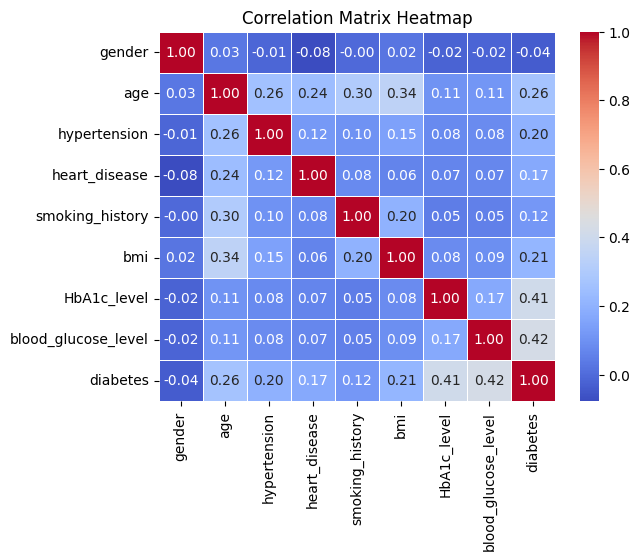

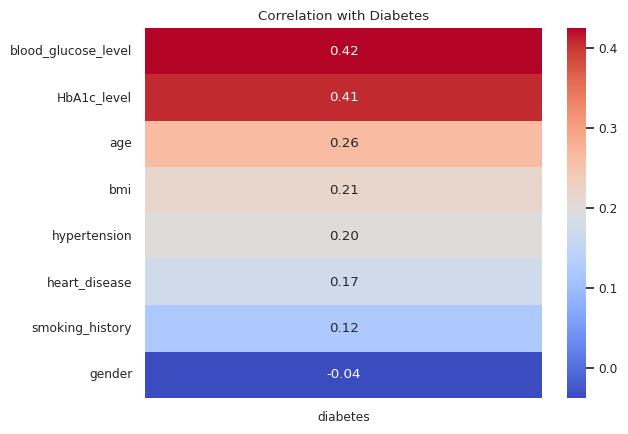

In [ ]:
corr_matrix=df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

corr = df.corr()
target_corr = corr['diabetes'].drop('diabetes')

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Diabetes')
plt.show()

<h1> splitting the data </h1>

In [ ]:
y=df.diabetes  #labels
X=df.drop(columns="diabetes")#features

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state = 25, stratify=y)

<h2>Creating our classifier</h2>

In [ ]:
knn = KNeighborsClassifier(5)


training the model to our tain dataset

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

testing our model

In [ ]:
y_pred=knn.predict(X_test)
print("input")
print(type(X_test.iloc[0]))
print("output")
print(y_pred[0])

input
<class 'pandas.core.series.Series'>
output
0


In [ ]:
input={
    "gender":0,
    "age":44.0,
    "hypertension":0,
    "heart_disease":0,
    "smoking_history":1,
    "bmi":19.31,
    "HbA1c_level":6.5,
    "blood_glucose_level":200,
}
inputdf=pd.DataFrame([input])
output=knn.predict(inputdf)
print(output)


[0]


In [ ]:
import pickle

# Sauvegarder le modèle dans un fichier
with open('knn.pkl', 'wb') as model_file:
    pickle.dump(knn, model_file)

In [ ]:
from google.colab import files

files.download('knn.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

checking our accuracy

In [ ]:
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)
print(classification_report(y_test,y_pred))

0.9518444043821939
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     26299
           1       0.87      0.54      0.66      2545

    accuracy                           0.95     28844
   macro avg       0.91      0.76      0.82     28844
weighted avg       0.95      0.95      0.95     28844



Searching for the best K

In [ ]:
d_evaluation = {}
best_accuracy = 0
best_k = None

for k in range(1, 21):

  knn_loop = KNeighborsClassifier(k)
  knn_loop.fit(X_train, y_train)
  y_pred = knn_loop.predict(X_test)

  acc = accuracy_score(y_test, y_pred)
  #print(acc)

  if acc > best_accuracy:
    best_k = k
    best_accuracy = acc
    print(best_accuracy)
  d_evaluation[k] = acc

0.9389127721536541
0.9519830814034115
0.9523644432117598


4


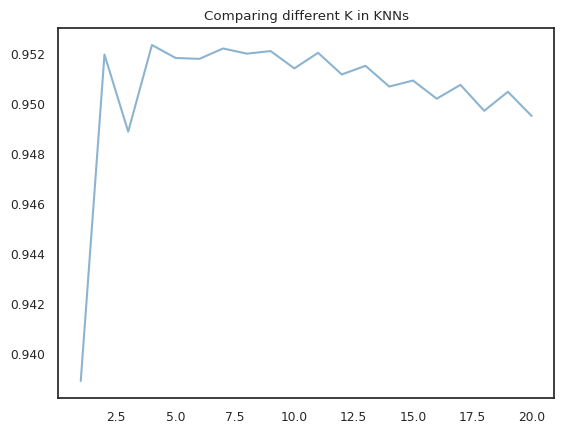

In [ ]:
plt.plot(d_evaluation.keys(), d_evaluation.values())
plt.title("Comparing different K in KNNs")
print(best_k)